# Video Game Sales: Data Analysis and Visualisation.

Video games have played a huge role in the lives of most of the people of the present and the past few generations. Today, we are going to analyze and visualise the history of sales of various famous video games that filled our childhood with joy. I got this dataset from the resource link provided by the jovian team. I'm going to use pandas and numpy to handle and analyze the data. Matplotlib and seaborn will be used to create data visualisations for better understanding of the data. The dataset contains a list of video games with sales greater than 100,000 copies and there are 16,598 records in the dataset.

## Data Preparation and Cleaning

Here, we will check our dataset for the missing values, irrelevent information and also the datatypes of the data and perform required changes in order to make our dataset fit for usage.


In [92]:
import pandas as pd

In [93]:
import numpy as np

In [94]:
games_main_df = pd.read_csv('vgsales.csv')#loading the dataset

In [95]:
games_main_df#displaying the dataframe

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [96]:
games_main_df.info()#getting the information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


We can clearly see that there are few null values in the "Year" and the "Publisher" columns

In [97]:
games_main_df.describe()#getting the insights about the dataframe using decribe function

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [98]:
games_main_df.isnull().sum()#getting the number of null values in our dataframe according to the column.

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

We can clearly see the column 'Year' has 271 null values and the column 'Publisher' has 58 null values. In order to make our data fit for the analysis, we need to handle these null values. The best option for this particular dataset would be to drop the rows with null values because there is no direct and efficient way to dig out these values. Dropping these rows will not make a significant difference in the dataset as our dataset is very large as compared to the rows containing null values.

In [99]:
games_main_df.dropna(inplace=True)#dropping the rows with null values

In [100]:
games_main_df.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [101]:
games_main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [102]:
games_main_df.shape #to check the dimension of our dataframe.

(16291, 11)

We can now observe that all the null(NaN) values have been removed from our dataframe. Previously there were 16,598 non-null values in the dataframe other than 'Year' and 'Publisher' column. But now, only 16,291 are left in every column. It means that we have successfully eliminated the rows containing null values.

Let us also drop the column rank as it is not really beneficial for our analysis.

In [103]:
games_main_df.drop(columns="Rank",inplace=True)

In [104]:
games_main_df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


The rank column is now gone.

In [105]:
import jovian

In [106]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "tusharojha134/project-video-game-sales" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/tusharojha134/project-video-game-sales


'https://jovian.ml/tusharojha134/project-video-game-sales'

## Exploratory Analysis and Visualization

**TODO** - Here we are going to perform various calculations on our data and based on them, we are going to visualize the data to come up with interesting facts and conclusions about our dataset.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [107]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

#### Computing various statistics of the numeric columns:

In [108]:
games_main_df.head(5)#checking the dataframe to get the insights.

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [109]:
#Let us first explore the details of our dataframe
Total_games=games_main_df["Name"].unique().size
print("The toatal games released were ",Total_games,".")

The toatal games released were  11325 .


In [110]:
Platforms=games_main_df["Platform"].unique()
print("The platforms of games released were: ",Platforms)

The platforms of games released were:  ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'GC' 'WiiU' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


In [111]:
Genre=games_main_df["Genre"].unique()
print("The genres of games released were: ",Genre)

The genres of games released were:  ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']


In [112]:
Publisher=games_main_df["Publisher"].unique()
Publisher_no=games_main_df["Publisher"].unique().size
print("The publishers of games released were: ",Publisher)


The publishers of games released were:  ['Nintendo' 'Microsoft Game Studios' 'Take-Two Interactive'
 'Sony Computer Entertainment' 'Activision' 'Ubisoft' 'Bethesda Softworks'
 'Electronic Arts' 'Sega' 'SquareSoft' 'Atari' '505 Games' 'Capcom'
 'GT Interactive' 'Konami Digital Entertainment'
 'Sony Computer Entertainment Europe' 'Square Enix' 'LucasArts'
 'Virgin Interactive' 'Warner Bros. Interactive Entertainment'
 'Universal Interactive' 'Eidos Interactive' 'RedOctane' 'Vivendi Games'
 'Enix Corporation' 'Namco Bandai Games' 'Palcom' 'Hasbro Interactive'
 'THQ' 'Fox Interactive' 'Acclaim Entertainment' 'MTV Games'
 'Disney Interactive Studios' 'Majesco Entertainment' 'Codemasters'
 'Red Orb' 'Level 5' 'Arena Entertainment' 'Midway Games' 'JVC'
 'Deep Silver' '989 Studios' 'NCSoft' 'UEP Systems' 'Parker Bros.' 'Maxis'
 'Imagic' 'Tecmo Koei' 'Valve Software' 'ASCII Entertainment' 'Mindscape'
 'Infogrames' 'Unknown' 'Square' 'Valve' 'Activision Value' 'Banpresto'
 'D3Publisher' 'Oxygen 

In [113]:
print("The total count of publishers was: ",Publisher_no)

The total count of publishers was:  576


Calculating the total sales in different region:

In [114]:
Total_Global_Sales = games_main_df["Global_Sales"].sum()
Total_NA_Sales = games_main_df["NA_Sales"].sum()
Total_EU_Sales = games_main_df["EU_Sales"].sum()
Total_JP_Sales = games_main_df["JP_Sales"].sum()
Total_Other_Sales = games_main_df["Other_Sales"].sum()
print("Total Global Sales were: ",Total_Global_Sales," million dollars.")
print("Total North America Sales were: ",Total_NA_Sales," million dollars.")
print("Total Europe Sales were: ",Total_EU_Sales," million dollars.")
print("Total Japan Sales were: ",Total_JP_Sales," million dollars.")
print("Total Other Sales were: ",Total_Other_Sales," million dollars.")

Total Global Sales were:  8811.97  million dollars.
Total North America Sales were:  4327.650000000001  million dollars.
Total Europe Sales were:  2406.69  million dollars.
Total Japan Sales were:  1284.2700000000002  million dollars.
Total Other Sales were:  788.9100000000001  million dollars.


Calculating the average sales in different regions:

In [115]:
Average_Global_Sales = games_main_df["Global_Sales"].mean()
Average_NA_Sales = games_main_df["NA_Sales"].mean()
Average_EU_Sales = games_main_df["EU_Sales"].mean()
Average_JP_Sales = games_main_df["JP_Sales"].mean()
Average_Other_Sales = games_main_df["Other_Sales"].mean()
print("Average Global Sales were: ",Average_Global_Sales," million dollars.")
print("Average North America Sales were: ",Average_NA_Sales," million dollars.")
print("Average Europe Sales were: ",Average_EU_Sales," million dollars.")
print("Average Japan Sales were: ",Average_JP_Sales," million dollars.")
print("Average Other Sales were: ",Average_Other_Sales," million dollars.")

Average Global Sales were:  0.5409103185808114  million dollars.
Average North America Sales were:  0.26564667607881653  million dollars.
Average Europe Sales were:  0.14773126266036463  million dollars.
Average Japan Sales were:  0.0788330980295869  million dollars.
Average Other Sales were:  0.048426124854213985  million dollars.


Calculating the percentage of sales in different region:

In [116]:
Percent_NA_Sales = (Total_NA_Sales/Total_Global_Sales)*100
Percent_EU_Sales = (Total_EU_Sales/Total_Global_Sales)*100
Percent_JP_Sales = (Total_JP_Sales/Total_Global_Sales)*100
Percent_Other_Sales = (Total_Other_Sales/Total_Global_Sales)*100
print("Percent North America Sales were: ",Percent_NA_Sales,"%")
print("Percent Europe Sales were: ",Percent_EU_Sales,"%")
print("Percent Japan Sales were: ",Percent_JP_Sales,"%")
print("Percent Other Sales were: ",Percent_Other_Sales,"%")

Percent North America Sales were:  49.11103873481186 %
Percent Europe Sales were:  27.31160001679534 %
Percent Japan Sales were:  14.574153112187178 %
Percent Other Sales were:  8.95270864517242 %


**Pie Plot** - Visualizing the composition of the dataframe according to the genre of the games released.

Text(0.5, 1.0, 'Composition of games released by genre')

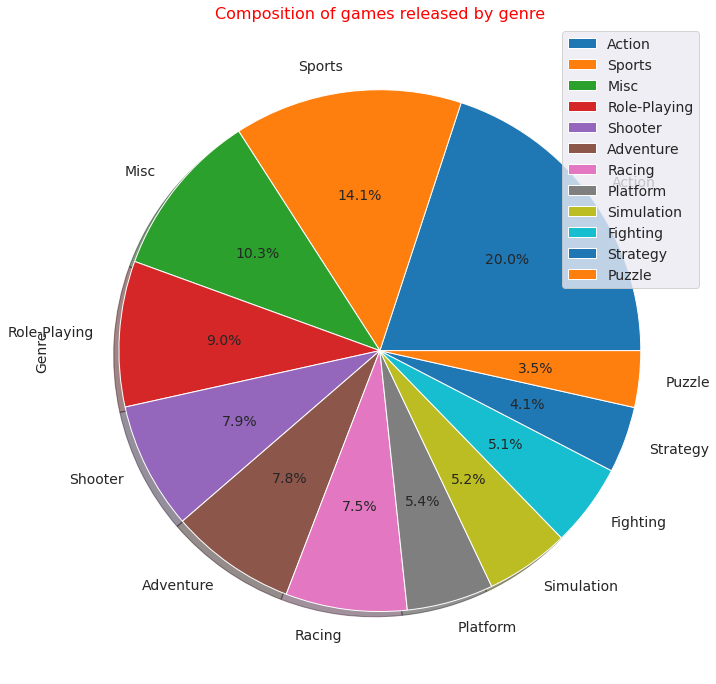

In [117]:
plot_df = pd.DataFrame(games_main_df['Genre'].value_counts(normalize=True))
plot = plot_df.plot.pie(subplots=True, autopct='%1.1f%%',shadow=True,figsize=(12,12))
plt.title('Composition of games released by genre',color = 'Red',fontsize = 16)

We can clearly observe from the pie chart that the maximum of the games released were of the "Acton" genre, with 20% of the total games released and 'Puzzle' was the genre with least number of games released with 3.5% of total game releases.

**Line Chart** - Let us now visualize year-wise sales of video games.

Text(0.5, 1.0, 'Year-wise sales of video games')

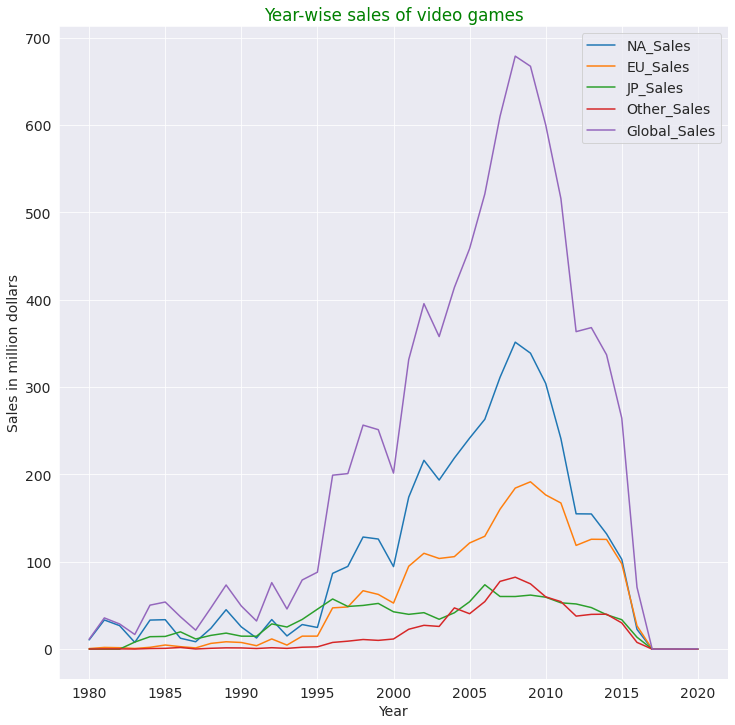

In [118]:
plot_line=games_main_df.groupby('Year').sum()#using pandas groupby method to make the plot
plot_line.plot.line(figsize=(12,12), grid="on");
plt.ylabel("Sales in million dollars");
plt.title("Year-wise sales of video games",color="green")

From the line chart above, we can clearly depict that the sales of games greatly increased with time, it means that more people got access to gaming platforms and were developing interest in games. We can also see that after around 2008, there has been a fall in sales of the games. The reasons could be the introduction of better platforms, new publishers taking over the market, lack of details in the dataset, people investing time in alternatives to games like social media.
We can also determine that, the most money was made in North America, after that Europe and then Japan.

**Counter Plot** - Visualizing the games distribution by platform in the market.

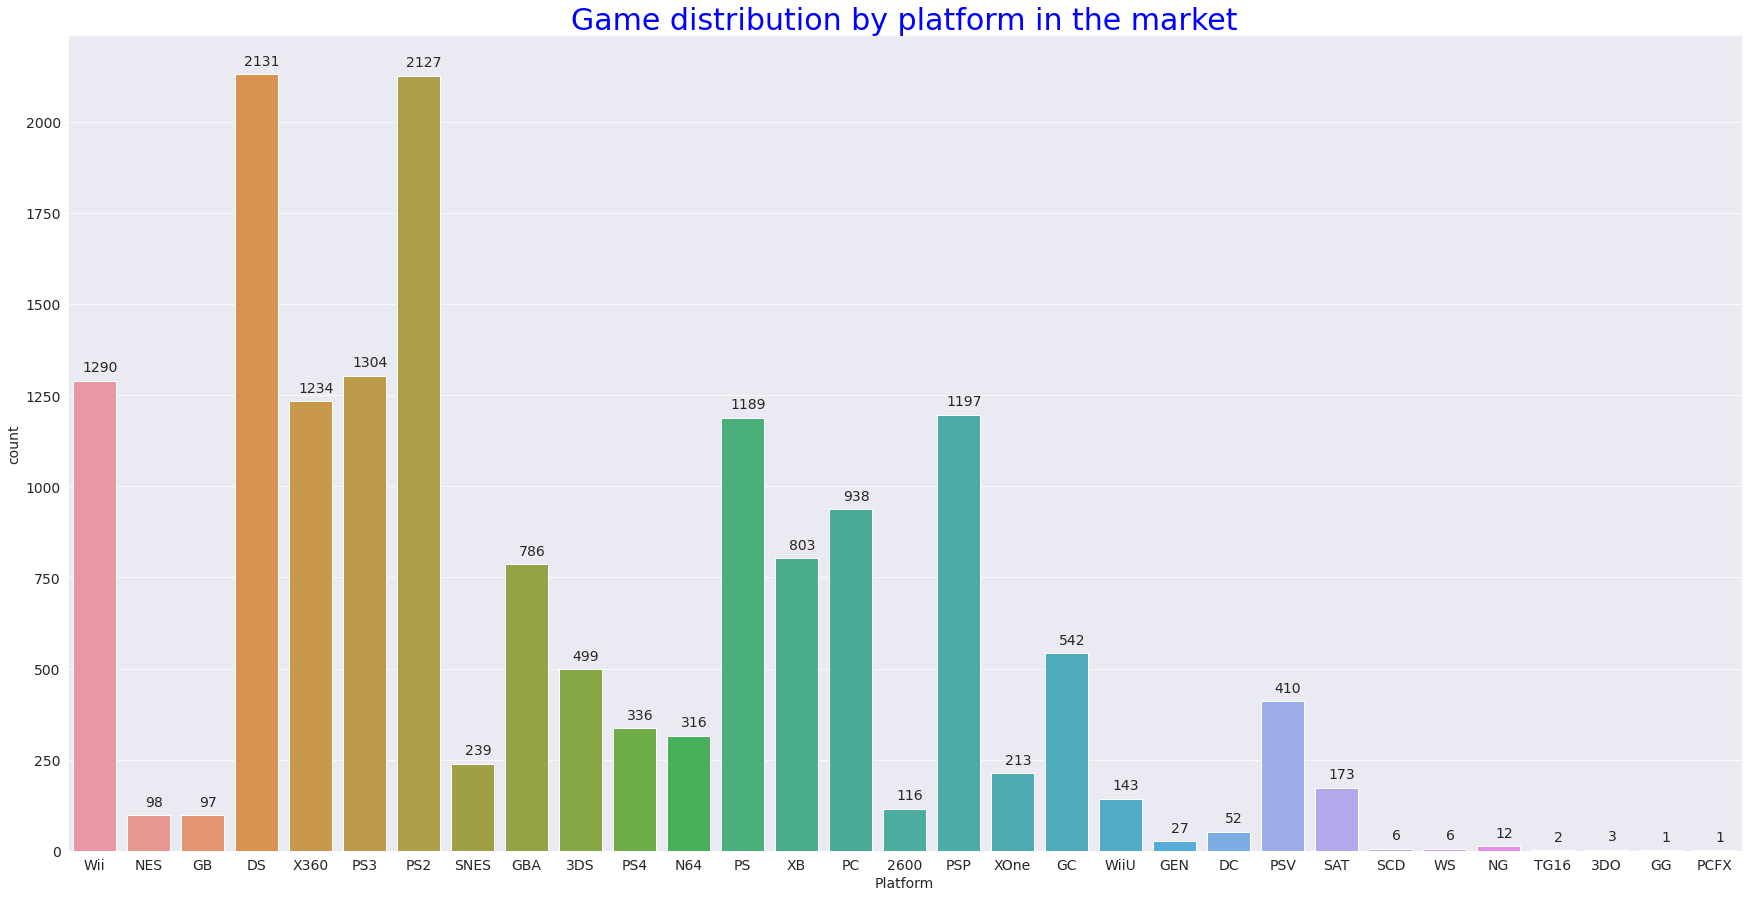

In [119]:
plt.figure(figsize=(30,15))
t=sns.countplot("Platform",data=games_main_df)
for i in t.patches:
    t.annotate(f'\n{i.get_height()}', (i.get_x()+0.5, i.get_height()+100), ha='center', va='top')
plt.title("Game distribution by platform in the market",color="blue",size=30)
plt.show()

From the counterplot, we can clearly see that most of the games were released for the DS platform with a count of 2131 beating PS2 with just 4 game counts. The least number of games were released for the PCFX platform with a count of 1 game.

**Pie Chart** - Now let us visualize the market share of top 20 Publishers using a pie chart like we did in genre.

Text(0.5, 1.0, 'Market Share of top 20 Publishers')

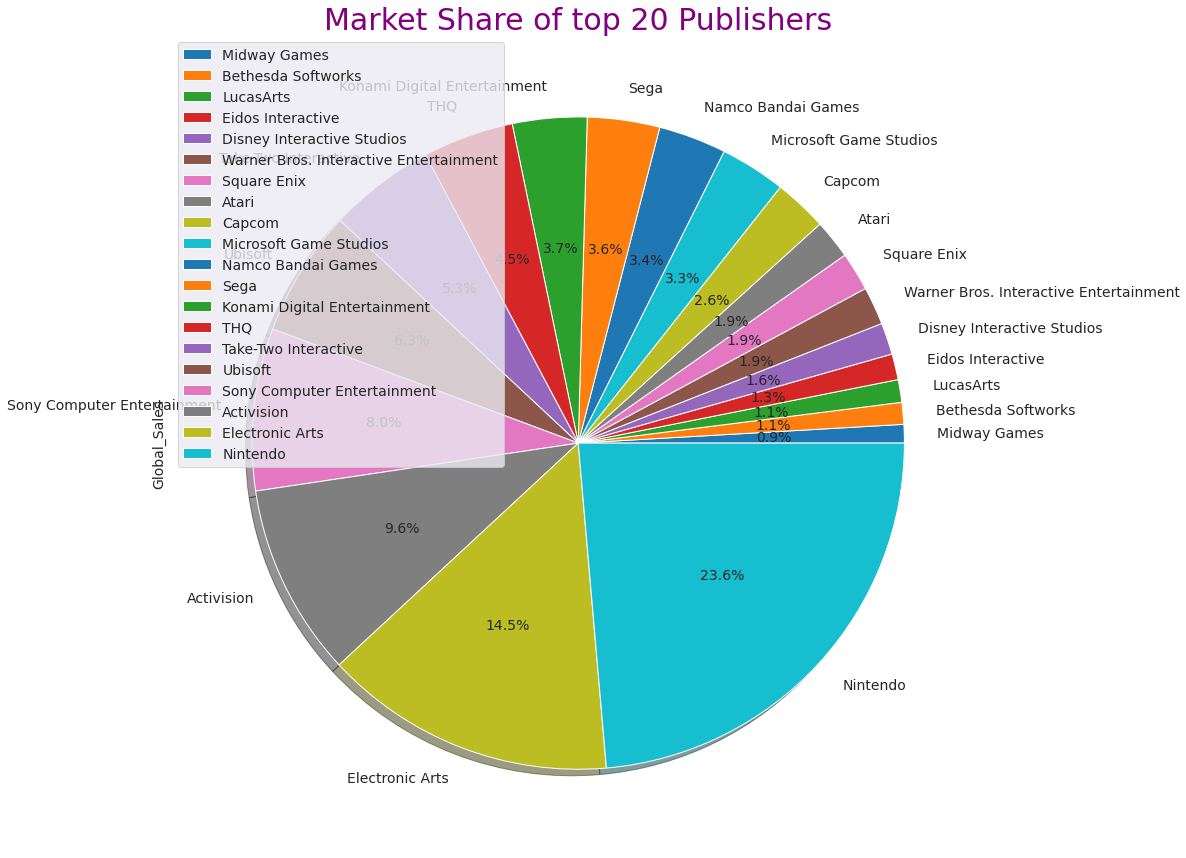

In [120]:
plot_df = pd.DataFrame(games_main_df.groupby('Publisher')['Global_Sales'].sum())
plot_df.sort_values(by=['Global_Sales'], inplace=True)
plot = plot_df.tail(20).plot.pie(subplots=True, autopct='%1.1f%%',shadow=True,figsize=(15,15))
plt.title('Market Share of top 20 Publishers',color = 'Purple',fontsize = 30)

From the above pie chart, we can clearly see that Nintendo held the most market shares, i.e, 23.6%. Electronic Arts was in second place with 14.5% global market shares and Activision held 9.6% global market shares.

**Point Plot** - Let us visualize year-wise number of releases of games.

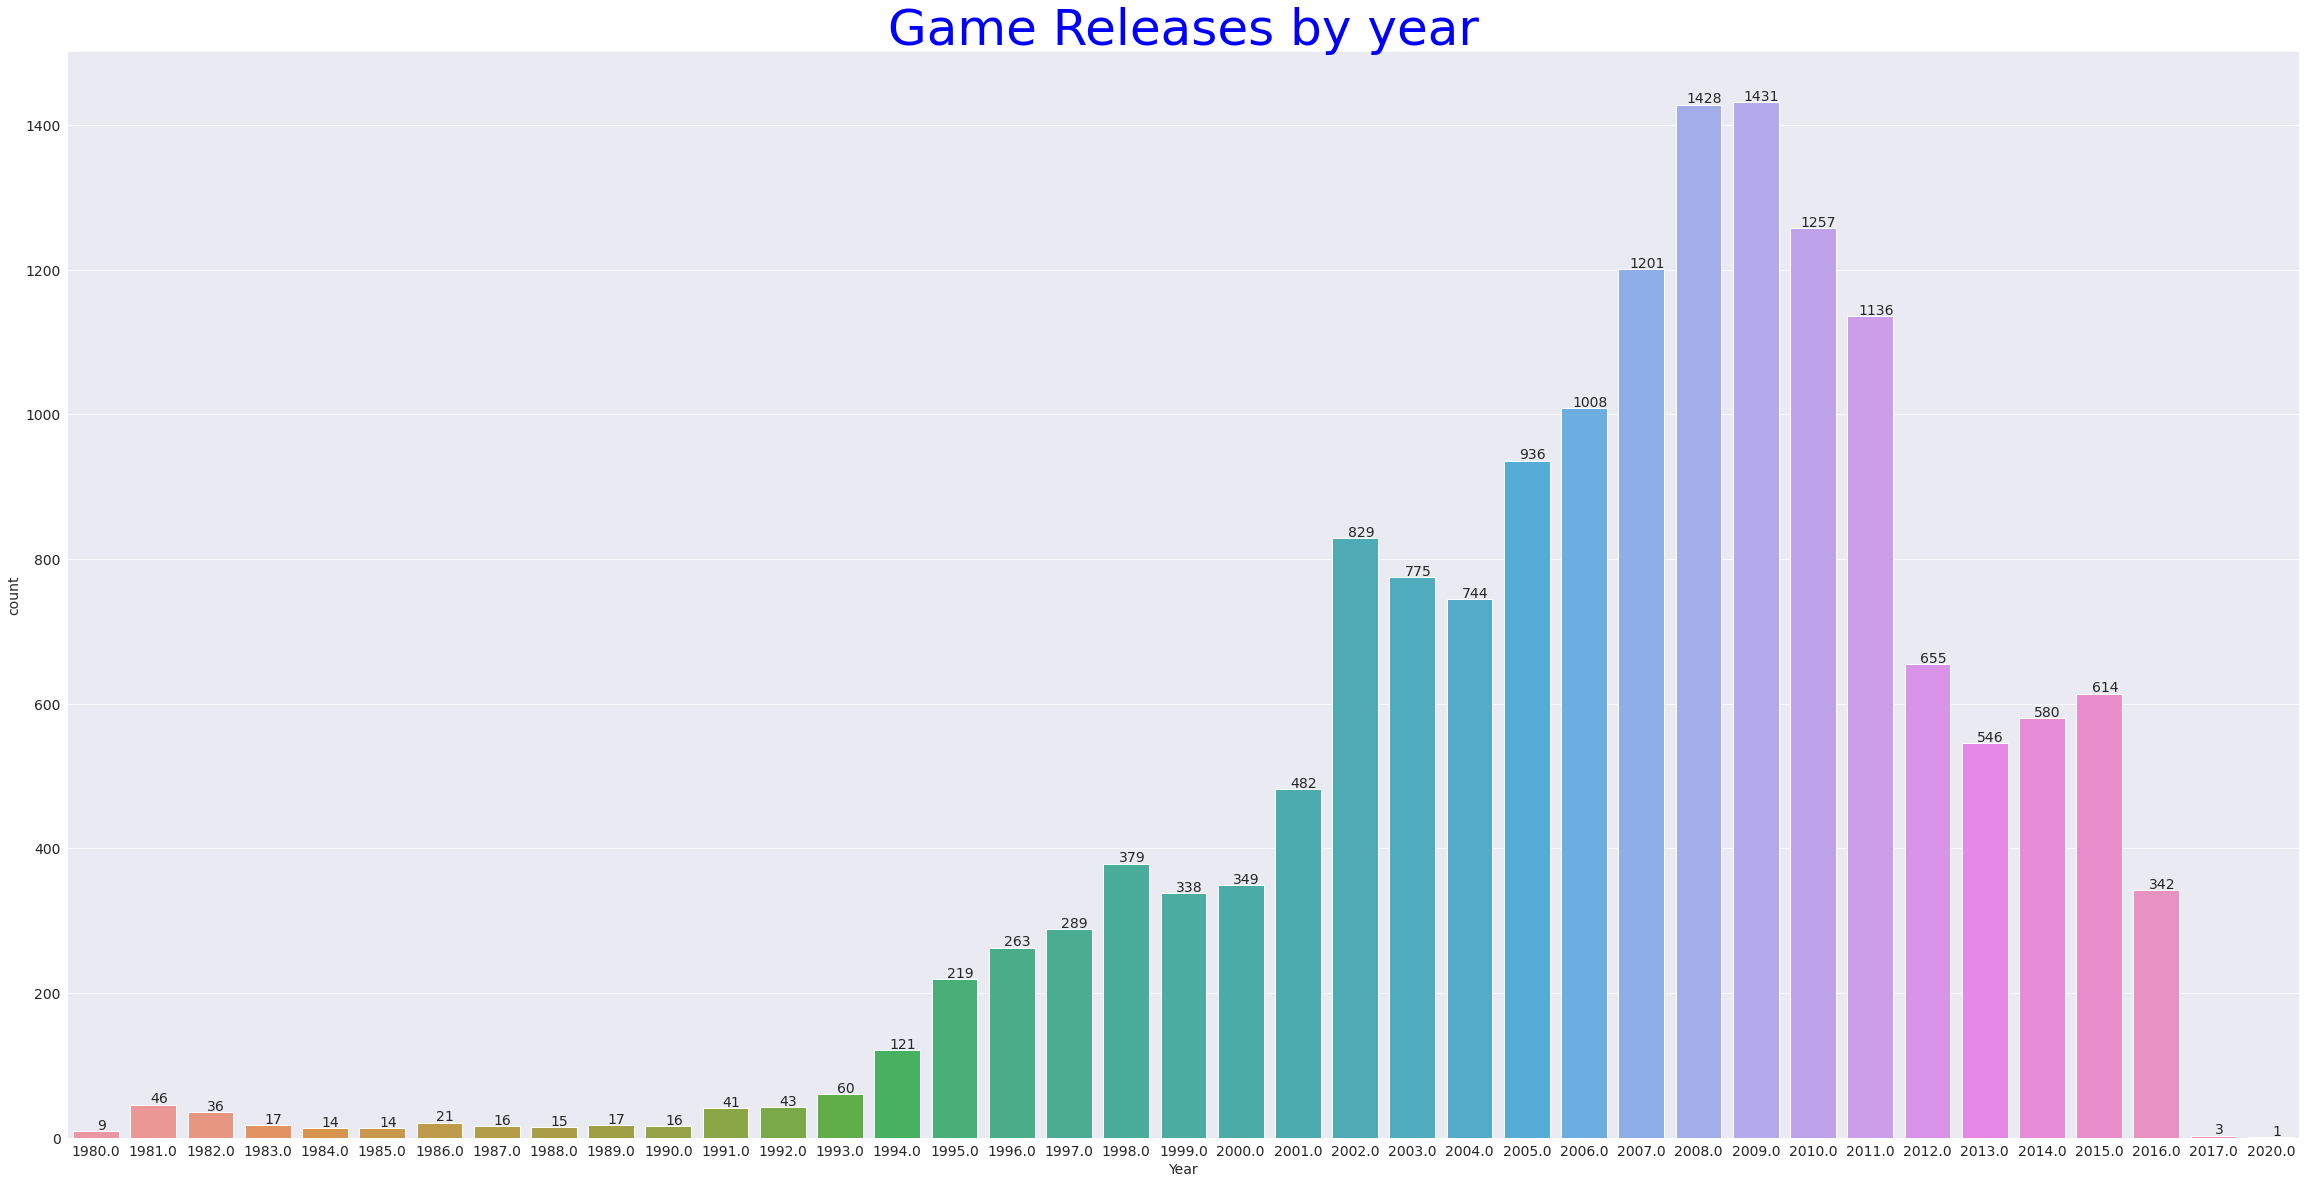

In [121]:
plt.figure(figsize=(40,20))
t=sns.countplot("Year",data=games_main_df)
for i in t.patches:
    t.annotate(f'\n{i.get_height()}', (i.get_x()+0.5, i.get_height()+40), ha='center', va='top')
plt.title("Game Releases by year",color="blue",size=50)
plt.show()

The above plot shows that 2009 was the year with maximum number of game releases, i.e., 1431 and 1980 with least number of games releases, i.e.,. Here we are not considering the years above 2016 because we had data inconsistencies there and we had to clean them while preprocessing of data, which made us lose quite significant data above the year 2016.

Let us save and upload our work to Jovian before continuing

In [122]:
import jovian

In [123]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "tusharojha134/project-video-game-sales" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/tusharojha134/project-video-game-sales


'https://jovian.ml/tusharojha134/project-video-game-sales'

## Asking and Answering Questions

We will now look into some interesting insights about the dataset. We will be taking up questions and will try to answer them by creating visualizations of the data.



#### Q1: Which game was highest  selling game in each of the regions?

0    Wii Sports
Name: Name, dtype: object


Text(0.5, 1.0, 'Top 5 North America selling games')

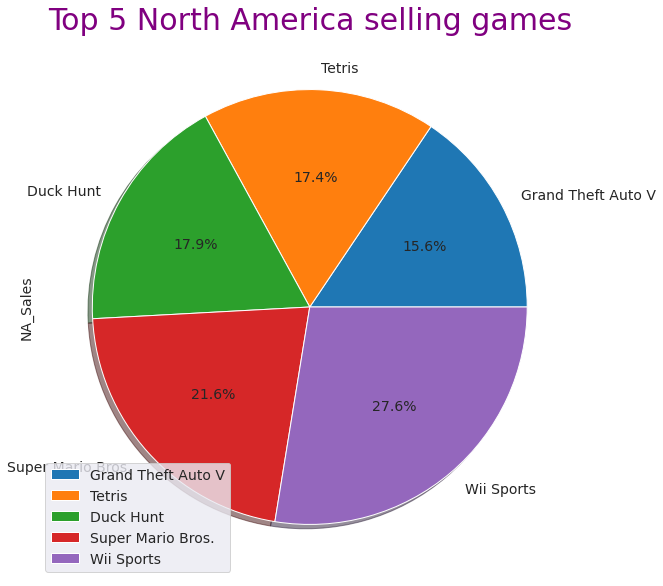

In [145]:
#Finding the maximum selling Game in North America
High_NA=games_main_df[games_main_df["NA_Sales"]==games_main_df["NA_Sales"].max()]#max() method is used to find the maximum element present in a numeric column.
print(High_NA['Name'])

plot_df = pd.DataFrame(games_main_df.groupby('Name')['NA_Sales'].sum())#sum() method is used to find the total of a column
plot_df.sort_values(by=['NA_Sales'], inplace=True)#used to sort values in ascending order
plot = plot_df.tail(5).plot.pie(subplots=True, autopct='%1.1f%%',shadow=True,figsize=(10,10))#used to draw pie charts
plt.title('Top 5 North America selling games',color = 'Purple',fontsize = 30)#used to set title to a visualization.

0    Wii Sports
Name: Name, dtype: object


Text(0.5, 1.0, 'Top 5 Europe selling games')

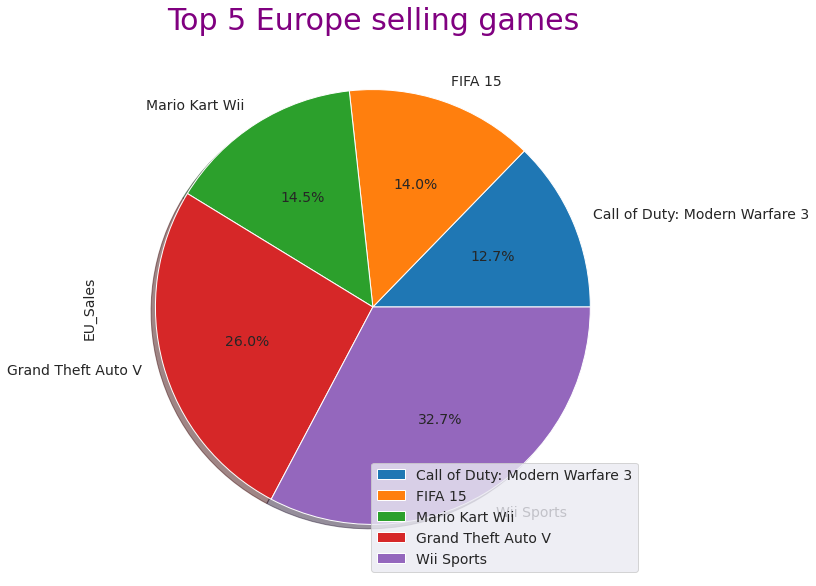

In [125]:
#Finding the maximum selling Game in Europe
High_EU=games_main_df[games_main_df["EU_Sales"]==games_main_df["EU_Sales"].max()]#max() method is used to find the maximum element present in a numeric column.
print(High_EU["Name"])


plot_df = pd.DataFrame(games_main_df.groupby('Name')['EU_Sales'].sum())#sum() method is used to find the total of a column
plot_df.sort_values(by=['EU_Sales'], inplace=True)#used to sort values in ascending order
plot = plot_df.tail(5).plot.pie(subplots=True, autopct='%1.1f%%',shadow=True,figsize=(10,10))#used to draw pie charts
plt.title('Top 5 Europe selling games',color = 'Purple',fontsize = 30)#used to set title to a visualization.

4    Pokemon Red/Pokemon Blue
Name: Name, dtype: object


Text(0.5, 1.0, 'Top 5 Japan selling games')

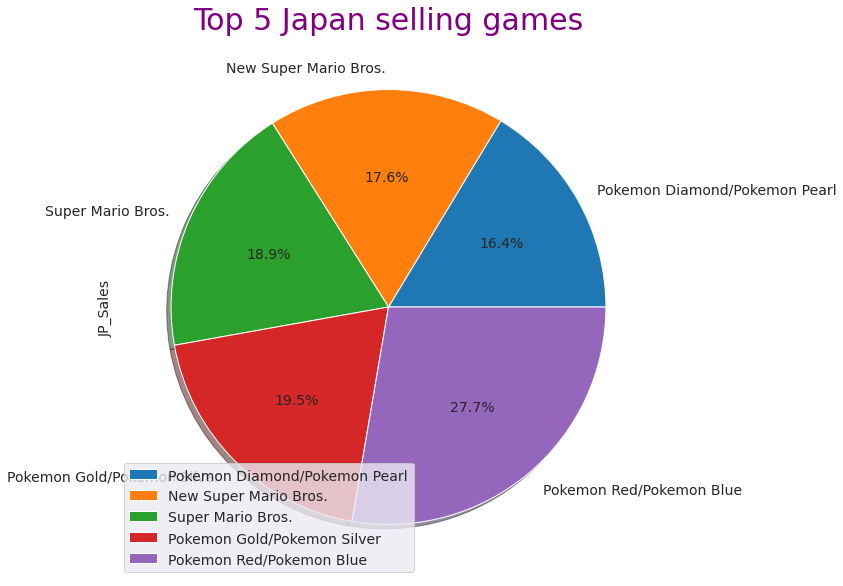

In [126]:
#Finding the maximum selling Game in Japan
High_JP=games_main_df[games_main_df["JP_Sales"]==games_main_df["JP_Sales"].max()]#max() method is used to find the maximum element present in a numeric column.
print(High_JP["Name"])


plot_df = pd.DataFrame(games_main_df.groupby('Name')['JP_Sales'].sum())#sum() method is used to find the total of a column
plot_df.sort_values(by=['JP_Sales'], inplace=True)#used to sort values in ascending order
plot = plot_df.tail(5).plot.pie(subplots=True, autopct='%1.1f%%',shadow=True,figsize=(10,10))#used to draw pie charts
plt.title('Top 5 Japan selling games',color = 'Purple',fontsize = 30)#used to set title to a visualization.

17    Grand Theft Auto: San Andreas
Name: Name, dtype: object


Text(0.5, 1.0, 'Top 5 Other region selling games')

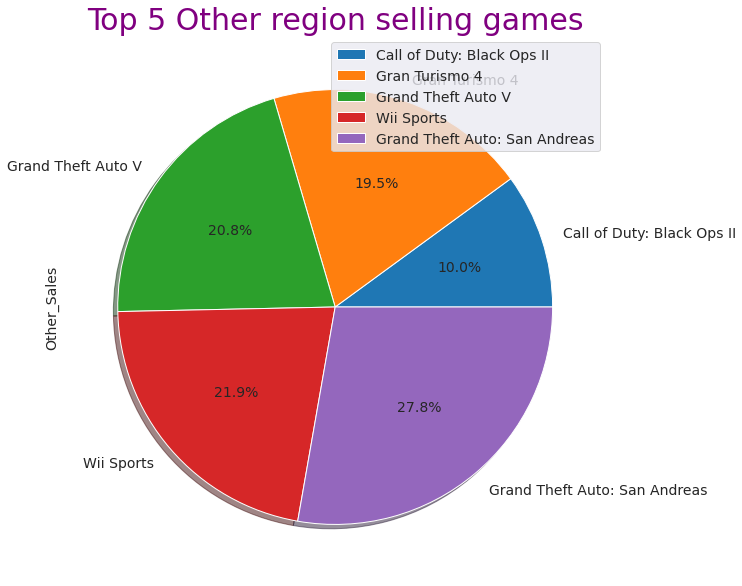

In [127]:
#Finding the maximum selling Game in North America
High_OT=games_main_df[games_main_df["Other_Sales"]==games_main_df["Other_Sales"].max()]#max() method is used to find the maximum element present in a numeric column.
print(High_OT["Name"])


plot_df = pd.DataFrame(games_main_df.groupby('Name')['Other_Sales'].sum())#sum() method is used to find the total of a column
plot_df.sort_values(by=['Other_Sales'], inplace=True)#used to sort values in ascending order
plot = plot_df.tail(5).plot.pie(subplots=True, autopct='%1.1f%%',shadow=True,figsize=(10,10))#used to draw pie charts
plt.title('Top 5 Other region selling games',color = 'Purple',fontsize = 30)#used to set title to a visualization.

The highest selling game in North America is: **Wii Sports**.

The highest selling game in Europe is: **Wii Sports**.

The highest selling game in Japan is: **Pokemon Red/Pokemon Blue**.

The highest selling game in North America is: **Grand Theft Auto: San Andreas**.

#### Q2: Which genre had  the highest global sales?

Text(0.5, 1.0, 'Genres highest to lowest selling')

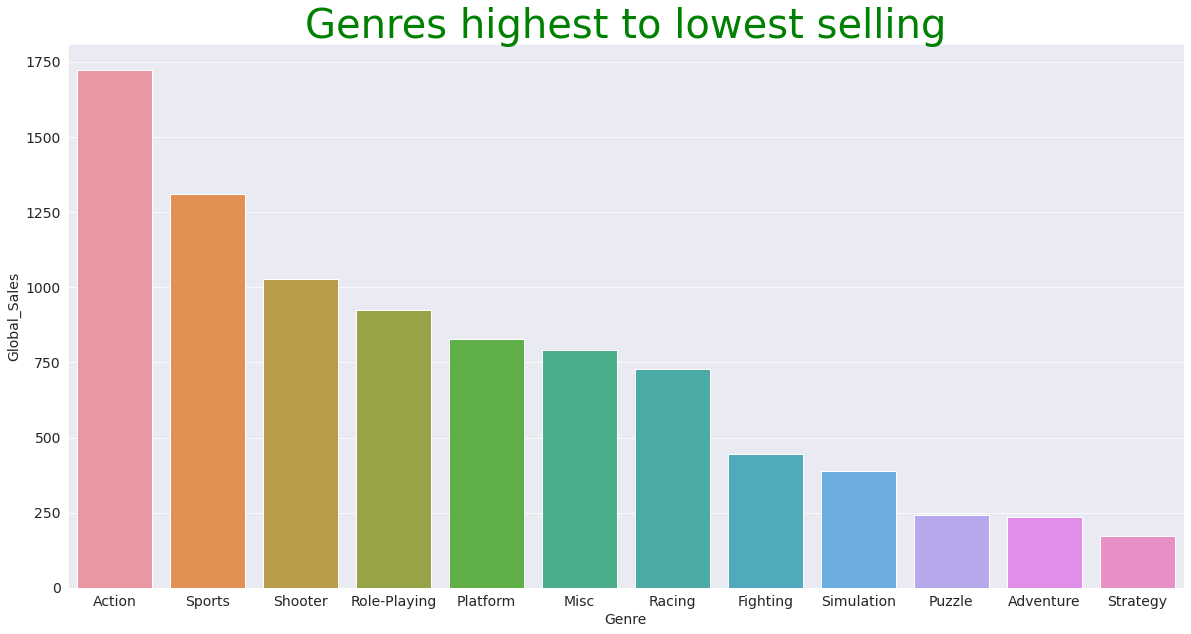

In [128]:
plot_dfs = pd.DataFrame(games_main_df.groupby('Genre')['Global_Sales'].sum())#creating a datafraame with values of genre as per global sales.
plot_dfs = plot_dfs.reset_index()
plot_dfs= plot_dfs.sort_values(by=['Global_Sales'], ascending=False)#sorting the values according to global sales in descending order.
plt.figure(figsize=(20, 10))#setting the dimensions of the plot
sns.barplot(x="Genre", y="Global_Sales", data=plot_dfs,)#creating the seaborn bar plot.
plt.title("Genres highest to lowest selling", color='green',size=40)#giving a title to the plot.

From the above representation, we can clearly see that global highest selling genre was **Action** with about 1700 million dollar sales.

The second position was held by **Sports** with about 1300 million dollar sales.

The third position was held by **Shooter** with about 1000 million dollar sales.

#### Q3: Which Publisher released most number of games?

Text(0.5, 1.0, 'Top 10 Publishers based on released games')

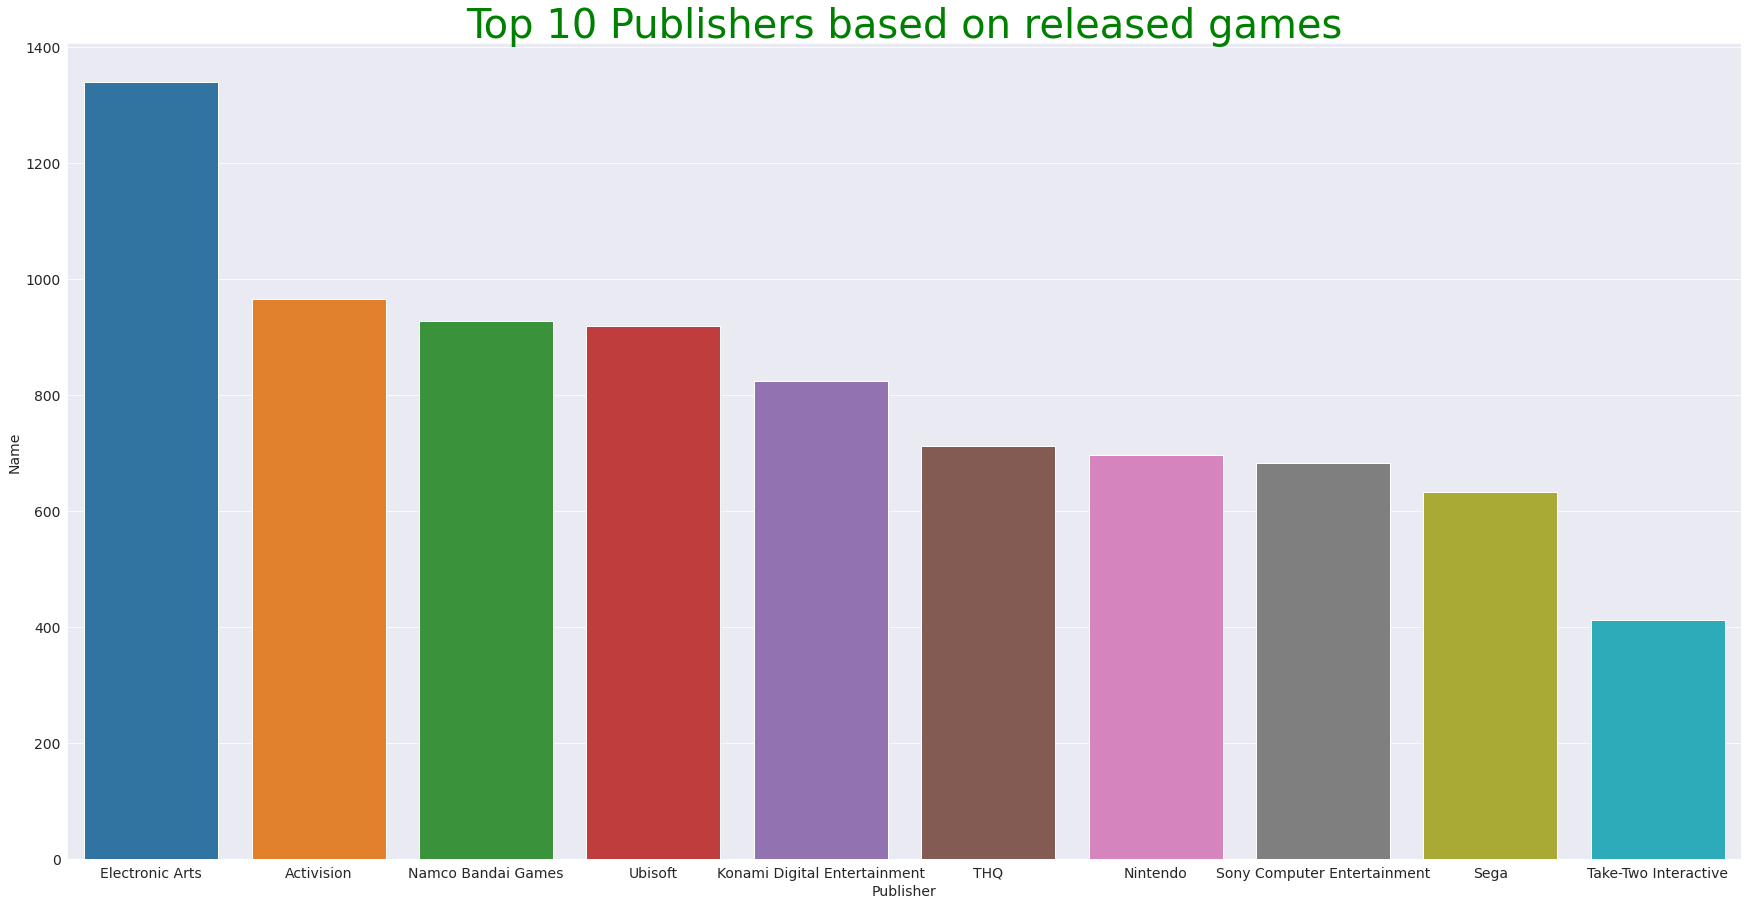

In [129]:
plot_games = pd.DataFrame(games_main_df.groupby('Publisher')['Name'].count())#creating a datafraame with values of publishers as per game name count.
plot_games = plot_games.reset_index()
plot_games= plot_games.sort_values(by=['Name'], ascending=False)#sorting the dataframe by the game name count in descending order.
plot_games=plot_games.head(10)#taking top 10 values from the dataframe
plt.figure(figsize=(30,15))#setting the dimensions of the plot
sns.barplot(x="Publisher", y="Name", data=plot_games,)#creating the seaborn bar plot.
plt.title("Top 10 Publishers based on released games", color='green',size=40)#giving a title to the plot.

From the barplot above, we can clearly see that **Electronic Arts** released most number of games, close to 1350.

The second position was held by **Activison** with around 970 games.

At the third position, there was **Namco Bandai** Games with around 930 games.

#### Q4: Which platform had the maximum global market value?

Text(0.5, 1.0, 'Top 10 Platforms based on global sales')

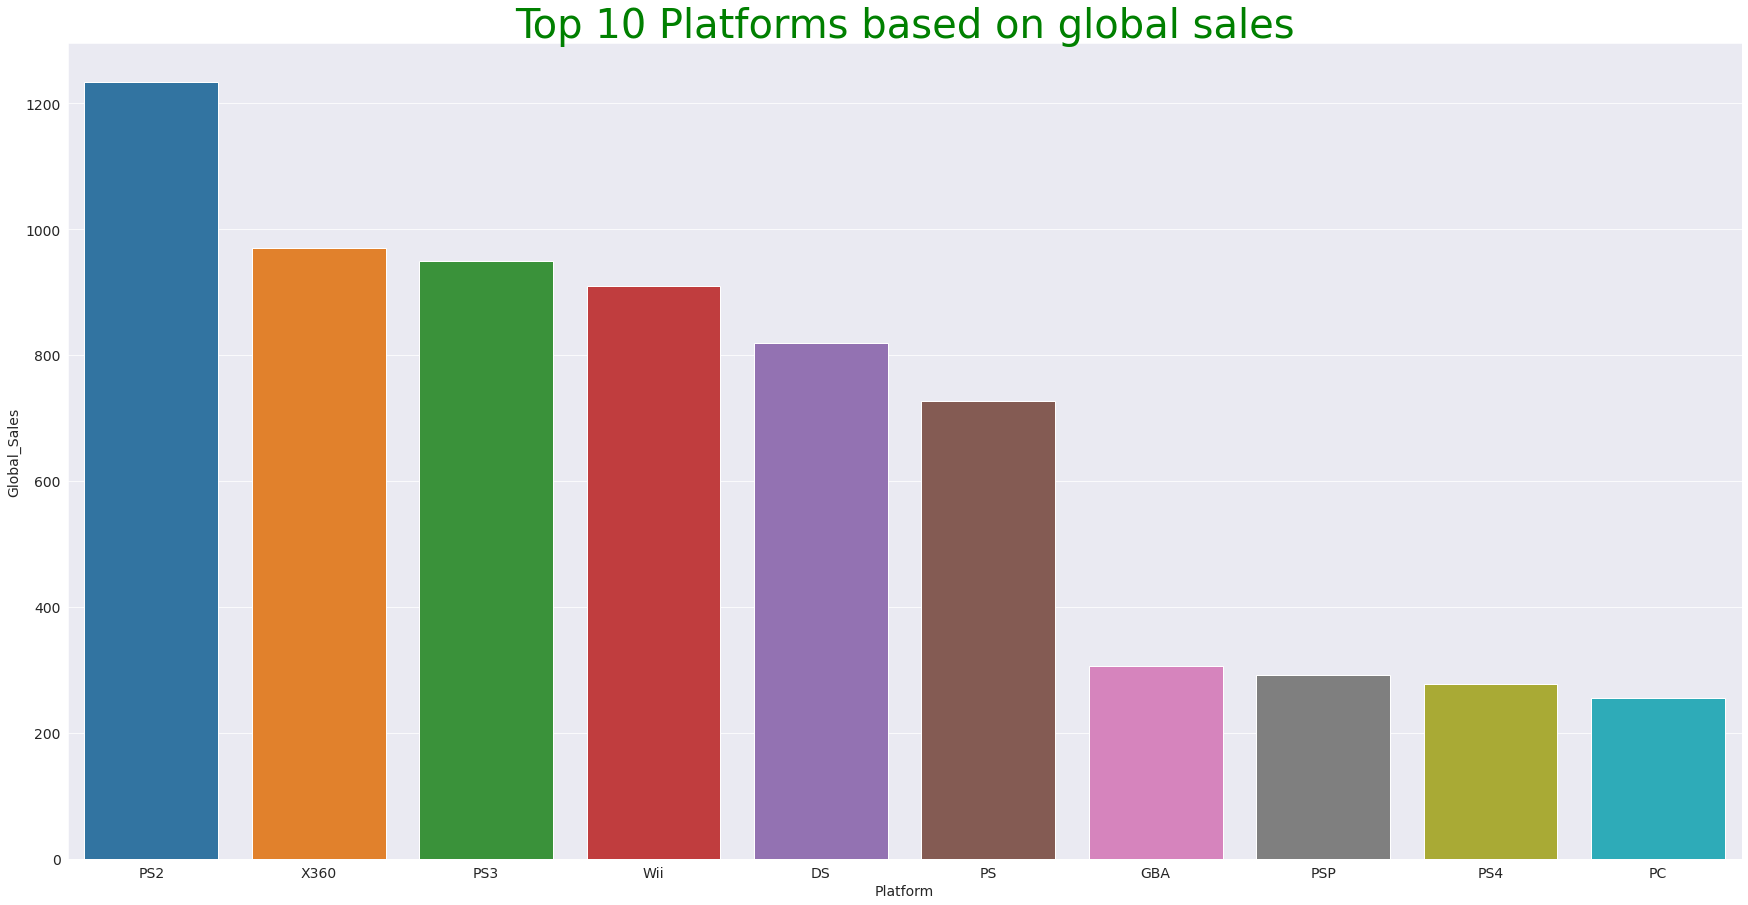

In [130]:
plot_games = pd.DataFrame(games_main_df.groupby('Platform')['Global_Sales'].sum())#creating a datafraame with values of publishers as per total global sales.
plot_games = plot_games.reset_index()
plot_games= plot_games.sort_values(by=['Global_Sales'], ascending=False)#sorting the dataframe by the total global sales in descending order.
plot_games=plot_games.head(10)#taking top 10 values from the dataframe
plt.figure(figsize=(30,15))#setting the dimensions of the plot
sns.barplot(x="Platform", y="Global_Sales", data=plot_games,)#creating the seaborn bar plot.
plt.title("Top 10 Platforms based on global sales", color='green',size=40)#giving a title to the plot.

Looking at the barplot above, we can conclude that:

**PS2** was the platform with highest global market value.

**X360** stood in the second position.

**PS3** held the third position.

while the most widely used platform, **Wii** held the fourth position in terms of global market value.

#### Q5: WHICH PLATFORMS HAD THE LARGEST MARKET VALUE  IN EACH OF THE REGIONS?

Text(0.5, 1.0, 'Top 5 platforms with largest market value in North America')

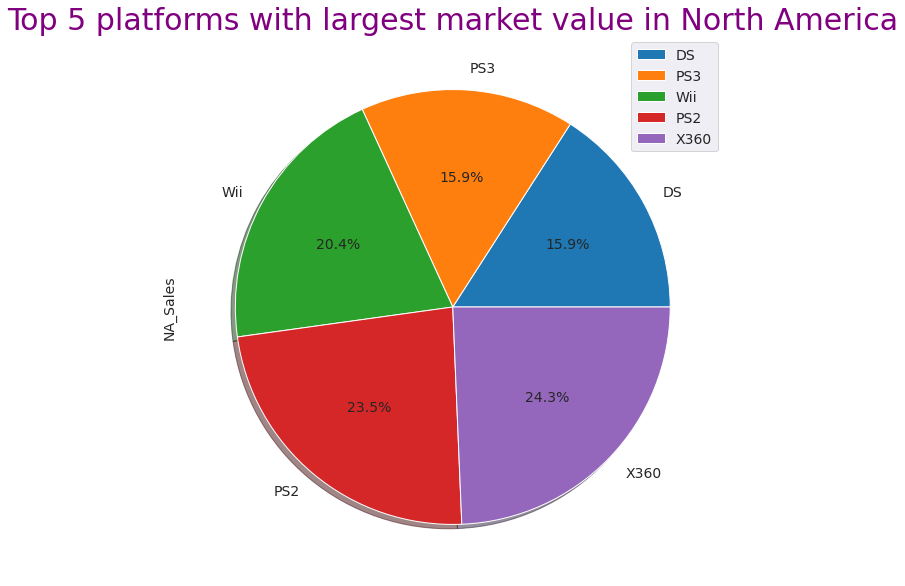

In [131]:
#In North America:
plot_df = pd.DataFrame(games_main_df.groupby('Platform')['NA_Sales'].sum())#sum() method is used to find the total of a column
plot_df.sort_values(by=['NA_Sales'], inplace=True)#used to sort values in ascending order
plot = plot_df.tail(5).plot.pie(subplots=True, autopct='%1.1f%%',shadow=True,figsize=(10,10))#used to draw pie charts
plt.title('Top 5 platforms with largest market value in North America',color = 'Purple',fontsize = 30)#used to set title to a visualization.

Text(0.5, 1.0, 'Top 5 platforms with largest market value in Europe')

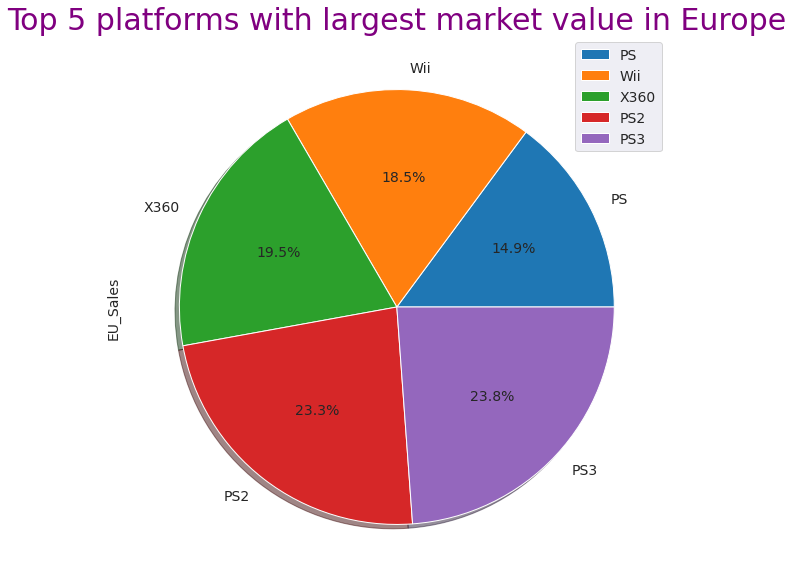

In [132]:
#In Europe:
plot_df = pd.DataFrame(games_main_df.groupby('Platform')['EU_Sales'].sum())#sum() method is used to find the total of a column
plot_df.sort_values(by=['EU_Sales'], inplace=True)#used to sort values in ascending order
plot = plot_df.tail(5).plot.pie(subplots=True, autopct='%1.1f%%',shadow=True,figsize=(10,10))#used to draw pie charts
plt.title('Top 5 platforms with largest market value in Europe',color = 'Purple',fontsize = 30)#used to set title to a visualization.

Text(0.5, 1.0, 'Top 5 platforms with largest market value in Japan')

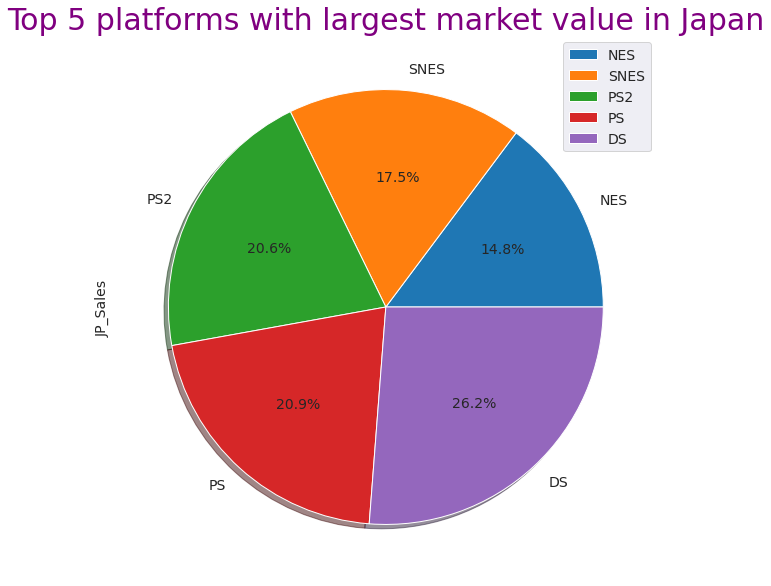

In [133]:
#In Japan:
plot_df = pd.DataFrame(games_main_df.groupby('Platform')['JP_Sales'].sum())#sum() method is used to find the total of a column
plot_df.sort_values(by=['JP_Sales'], inplace=True)#used to sort values in ascending order
plot = plot_df.tail(5).plot.pie(subplots=True, autopct='%1.1f%%',shadow=True,figsize=(10,10))#used to draw pie charts
plt.title('Top 5 platforms with largest market value in Japan',color = 'Purple',fontsize = 30)#used to set title to a visualization.

Text(0.5, 1.0, 'Top 5 platforms with largest market value in Other Regions')

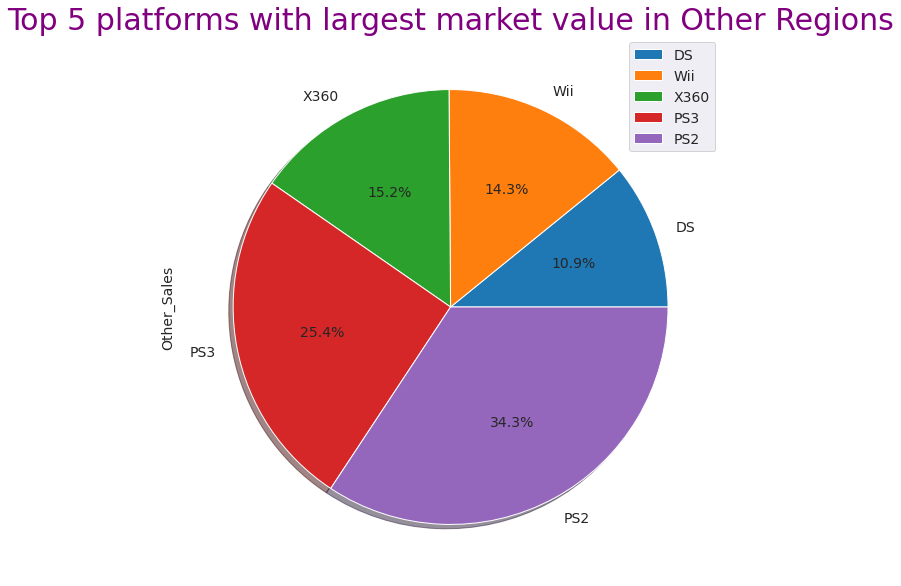

In [134]:
#In Other Regions:
plot_df = pd.DataFrame(games_main_df.groupby('Platform')['Other_Sales'].sum())#sum() method is used to find the total of a column
plot_df.sort_values(by=['Other_Sales'], inplace=True)#used to sort values in ascending order
plot = plot_df.tail(5).plot.pie(subplots=True, autopct='%1.1f%%',shadow=True,figsize=(10,10))#used to draw pie charts
plt.title('Top 5 platforms with largest market value in Other Regions',color = 'Purple',fontsize = 30)#used to set title to a visualization.

The platform with largest market value in **North America** was: **X360**

The platform with largest market value in **Europe** was: **PS3**

The platform with largest market value in **Japan** was: **DS**

The platform with largest market value in **Other regions** was: **PS2**

Whereas, globally, **PS2** had largest market value

Let us save and upload our work to Jovian before continuing.

In [135]:
import jovian

In [136]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "tusharojha134/project-video-game-sales" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/tusharojha134/project-video-game-sales


'https://jovian.ml/tusharojha134/project-video-game-sales'

## Inferences and Conclusion

**Following are the conclusions that I made**

The most valued genre globally was **Action**.

The most games were released for **DS** platform.

**Nintendo** held the largest share of sales in the global market.

The most number of games were released in the year **2009** and the count was **1431**.

The highest selling game in North America was **Wii Sports**.

The highest selling game in Europe was **Wii Sports**.

The highest selling game in Japan was **Pokemon Red/Pokemon Blue**.

The highest selling game in North America was **Grand Theft Auto: San Andreas**.

The global highest selling genre was **Action** with about **1700** million dollar sales.

**Electronic Arts** released most number of games, close to **1350** globally.

**PS2** was the platform with highest global market value.

The platform with largest market value in **North America** was **X360**.

The platform with largest market value in **Europe** was **PS3**.

The platform with largest market value in **Japan** was **DS**.

The platform with largest market value in **Other regions** was **PS2**.

The maximum revenue came from **North America** region.

The release of games showed a bit decline after the year **2008** globally. The reason could be better alternatives to present platforms, increase of social media usage as a time killer, incomplete data, etc.

In [141]:
import jovian

In [142]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "tusharojha134/project-video-game-sales" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/tusharojha134/project-video-game-sales


'https://jovian.ml/tusharojha134/project-video-game-sales'

## References and Future Work

The link for the dataset: https://www.kaggle.com/gregorut/videogamesales
The link for matplotlib tutorial: https://www.tutorialspoint.com/matplotlib/index.htm
The link for seaborn tutorial: https://seaborn.pydata.org/tutorial.html

The dataset is really good but it has a limitation, that is incomplete values for the recent years and also the data is not up to date. I believe this data can reveal really good insights about the history of the gaming industry, but, unfortunately due to lack of modern day game data, it will not be fair to use it as a tool to implement analysis for the present day market. Although, the dataset is really good for practice purpose and studying history of game industry.


In [146]:
import jovian

In [147]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "tusharojha134/project-video-game-sales" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/tusharojha134/project-video-game-sales


'https://jovian.ml/tusharojha134/project-video-game-sales'